In [89]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance


In [90]:
data=read_csv("DSLIB/data_set1.csv")
data=data[data['Code'].notna()]
data=data.dropna(axis=1)
xfeatures=data.loc[:,data.columns!="Project"]
xfeatures=xfeatures.loc[:,xfeatures.columns!="Project_name"]
xfeatures=xfeatures.loc[:,xfeatures.columns!="Submitted_by"]
xfeatures=xfeatures.loc[:,xfeatures.columns!="Sector"]
xfeatures=xfeatures.loc[:,xfeatures.columns!="Code"]
yfeatures=data["Project"]
x_train,x_test,y_train,y_test=train_test_split(xfeatures,yfeatures)


In [91]:
trained_model=DecisionTreeClassifier().fit(x_train,y_train)
score=trained_model.score(x_test,y_test)
score

0.8

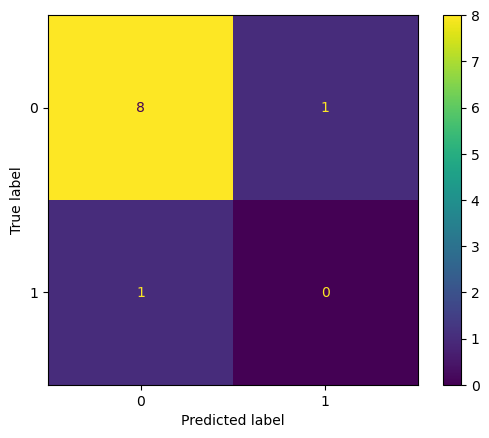

In [92]:
ytrain=trained_model.predict(x_test)
cf=confusion_matrix(y_test,ytrain)
ConfusionMatrixDisplay(confusion_matrix=cf).plot()

In [93]:
fi=trained_model.feature_importances_
fi


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.26315789,
       0.        , 0.        , 0.        , 0.73684211, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [94]:
i=0
for elem in fi: 
    if (elem >0):
        print(elem)
        print(x_train.columns[i])
    i=i+1


0.26315789473684204
SI_SKEW
0.736842105263158
CRI-R_AVG


<BarContainer object of 64 artists>

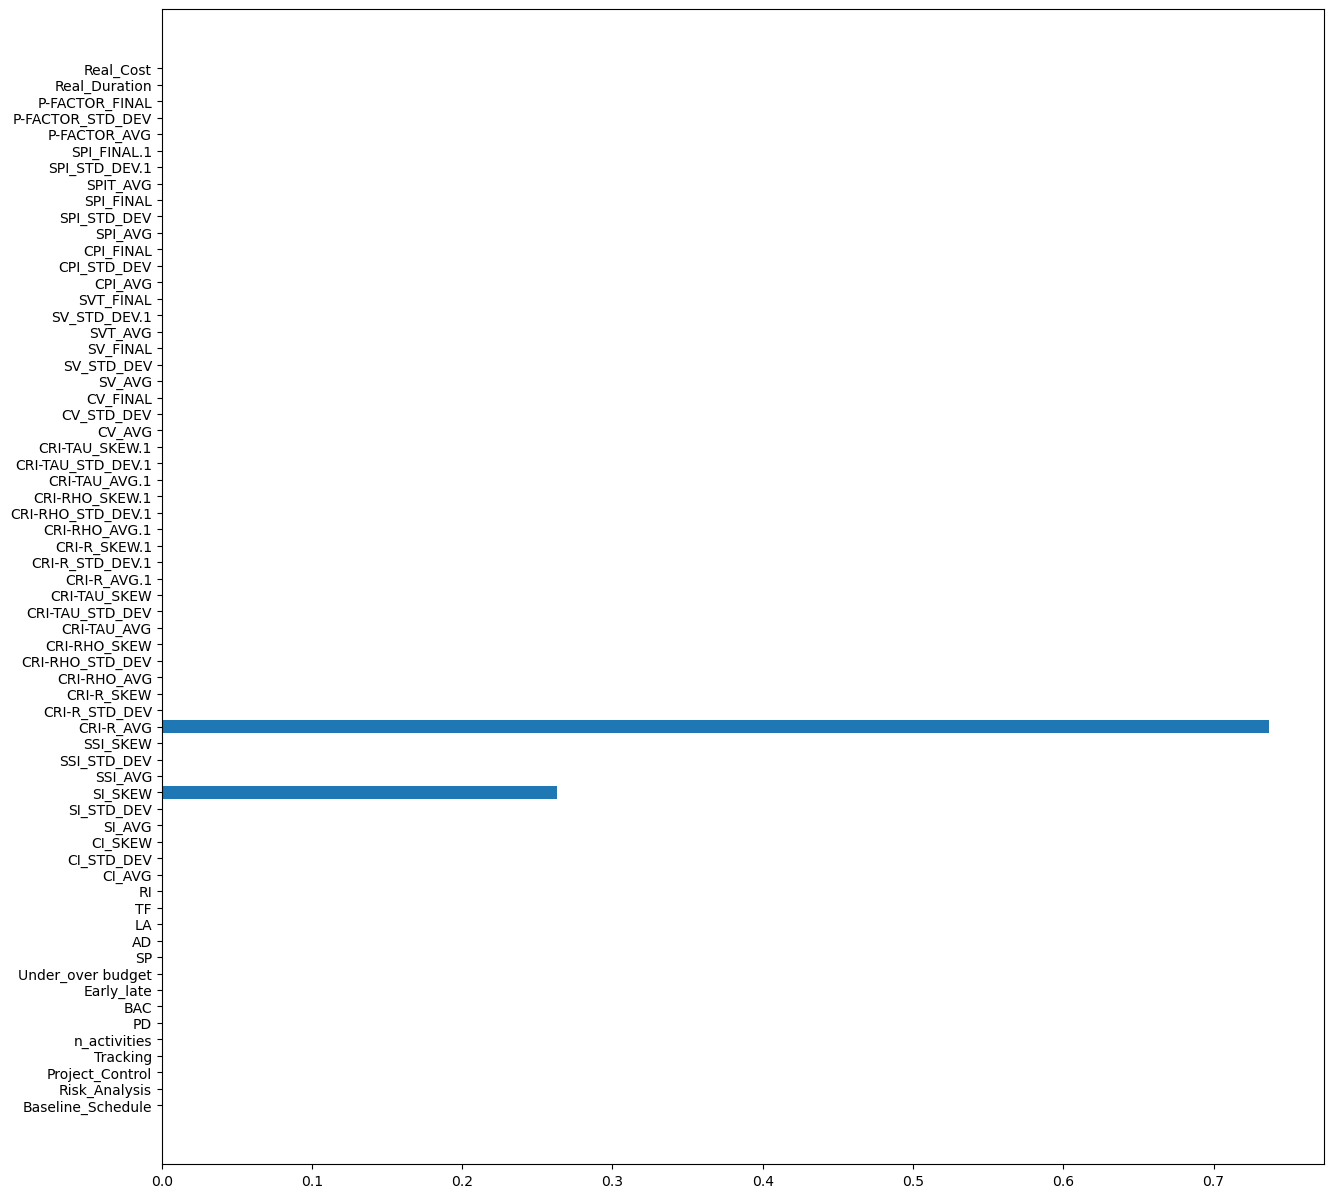

In [95]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(x_train.columns, fi)

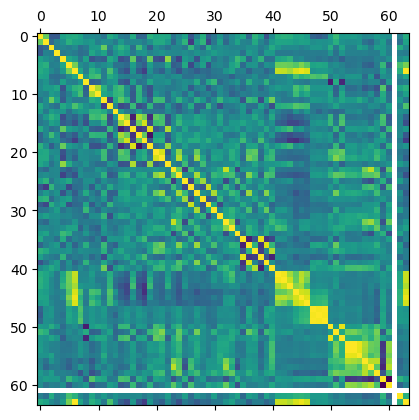

In [96]:
plt.matshow(x_train.corr())

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
trained_model_rf=RandomForestClassifier().fit(x_train,y_train)
score_rf=trained_model_rf.score(x_test,y_test)
score_rf

0.9

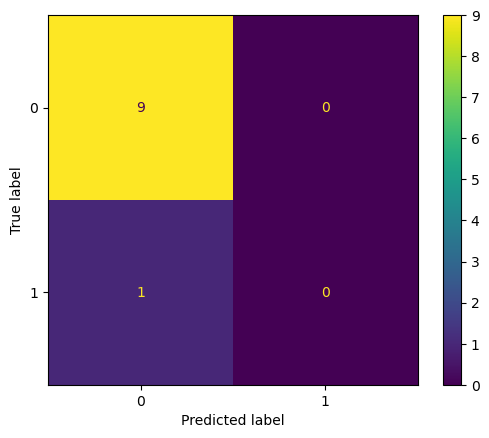

In [99]:
ytrain_rf=trained_model_rf.predict(x_test)
cf_rf=confusion_matrix(y_test,ytrain_rf)
ConfusionMatrixDisplay(confusion_matrix=cf_rf).plot()

In [100]:
fi_rf=trained_model_rf.feature_importances_
fi_rf

array([0.00313283, 0.        , 0.        , 0.        , 0.        ,
       0.02667814, 0.00313283, 0.02030059, 0.0092739 , 0.01679735,
       0.        , 0.        , 0.02380952, 0.00250334, 0.02352333,
       0.04502554, 0.        , 0.00286862, 0.03892845, 0.00250334,
       0.04392447, 0.05957197, 0.03585418, 0.07739841, 0.10100563,
       0.06263983, 0.02966468, 0.05898741, 0.02437127, 0.02667814,
       0.01807229, 0.        , 0.        , 0.        , 0.        ,
       0.01817043, 0.        , 0.        , 0.01775992, 0.        ,
       0.        , 0.01584152, 0.00691111, 0.00414925, 0.02380952,
       0.05040633, 0.00775551, 0.01190476, 0.01819057, 0.        ,
       0.00286862, 0.        , 0.        , 0.01134301, 0.01817043,
       0.        , 0.00313283, 0.00930833, 0.        , 0.00369458,
       0.00286862, 0.        , 0.01019462, 0.00687396])

In [101]:
i=0
for elem in fi_rf: 
    if (elem >0):
        print(elem)
        print(x_train.columns[i])
    i=i+1


0.0031328320802005
Baseline_Schedule
0.02667814113597246
PD
0.0031328320802005
BAC
0.0203005901155643
Early_late
0.00927390366642703
Under_over budget
0.016797348122649332
SP
0.023809523809523808
TF
0.0025033377837116156
RI
0.023523333511666418
CI_AVG
0.04502554038301206
CI_STD_DEV
0.002868617326448652
SI_AVG
0.03892844780695248
SI_STD_DEV
0.0025033377837116156
SI_SKEW
0.04392446633825945
SSI_AVG
0.059571966892719964
SSI_STD_DEV
0.035854181734696275
SSI_SKEW
0.07739841122362848
CRI-R_AVG
0.10100563007417461
CRI-R_STD_DEV
0.06263983470793988
CRI-R_SKEW
0.02966467893872613
CRI-RHO_AVG
0.05898741163484348
CRI-RHO_STD_DEV
0.024371273010111487
CRI-RHO_SKEW
0.026678141135972465
CRI-TAU_AVG
0.01807228915662651
CRI-TAU_STD_DEV
0.018170426065162906
CRI-RHO_AVG.1
0.017759917033964227
CRI-TAU_AVG.1
0.01584152179390275
CV_AVG
0.006911110897889293
CV_STD_DEV
0.0041492500614703715
CV_FINAL
0.023809523809523808
SV_AVG
0.05040633493303001
SV_STD_DEV
0.007755511843291533
SV_FINAL
0.011904761904761904
S

<BarContainer object of 64 artists>

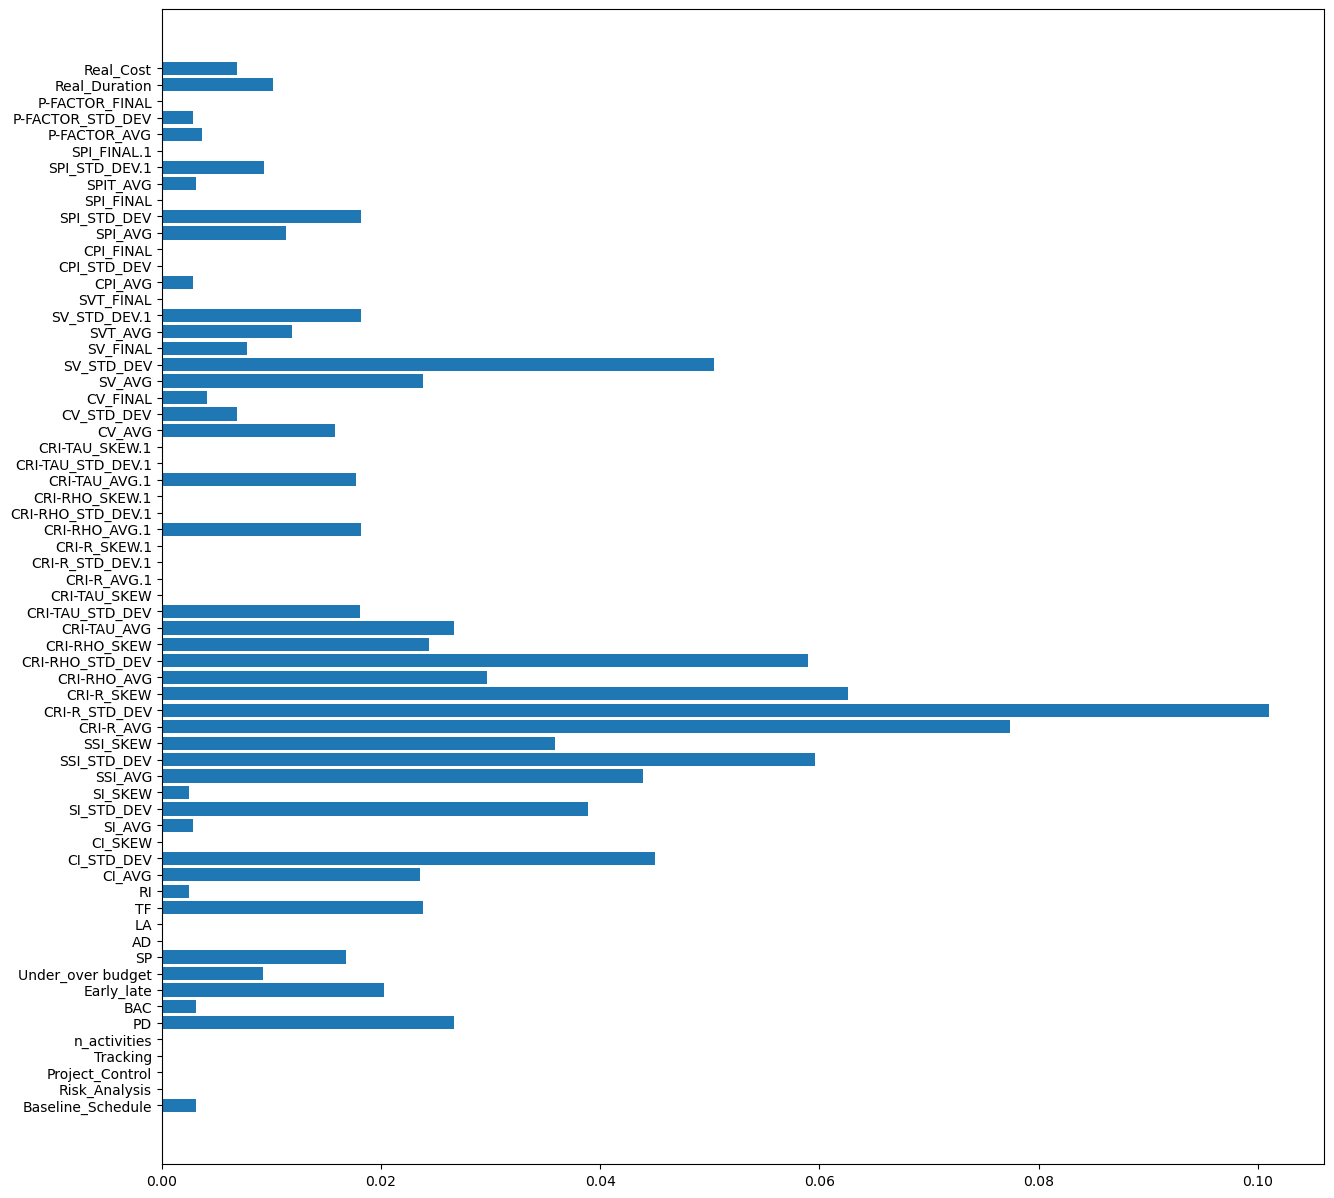

In [102]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(x_train.columns, fi_rf)

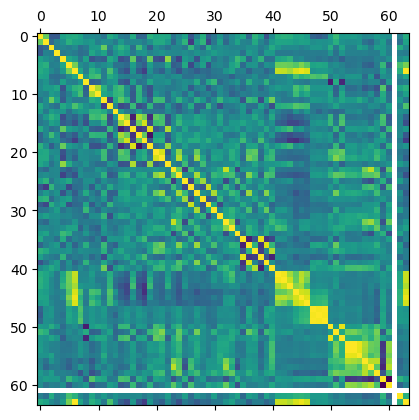

In [103]:
plt.matshow(x_train.corr())

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
trained_model_ada=AdaBoostClassifier().fit(x_train,y_train)
score_knn=trained_model_ada.score(x_test,y_test)
score_knn

0.9

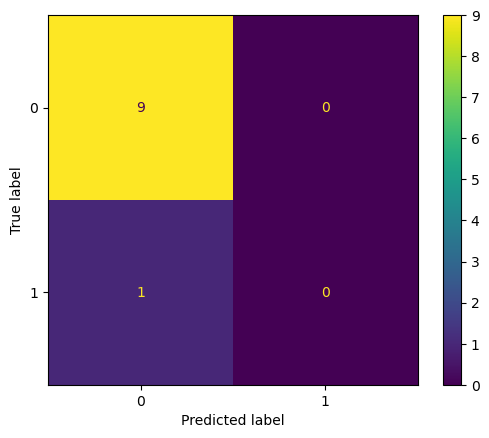

In [106]:
ytrain_ada=trained_model_ada.predict(x_test)
cf_ada=confusion_matrix(y_test,ytrain_ada)
ConfusionMatrixDisplay(confusion_matrix=cf_ada).plot()

In [107]:
fi_ada=trained_model_ada.feature_importances_
fi_ada

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.46, 0.  , 0.02, 0.06, 0.  , 0.  , 0.02, 0.  , 0.  , 0.02,
       0.04, 0.  , 0.  , 0.  , 0.16, 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.06, 0.06, 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02])

In [108]:
i=0
for elem in fi_ada: 
    if (elem >0):
        print(elem)
        print(x_train.columns[i])
    i=i+1

0.46
TF
0.02
CI_AVG
0.06
CI_STD_DEV
0.02
SI_STD_DEV
0.02
SSI_STD_DEV
0.04
SSI_SKEW
0.16
CRI-RHO_AVG
0.04
CRI-TAU_AVG
0.02
CRI-TAU_AVG.1
0.06
SV_AVG
0.06
SV_STD_DEV
0.02
SV_STD_DEV.1
0.02
Real_Cost


<BarContainer object of 64 artists>

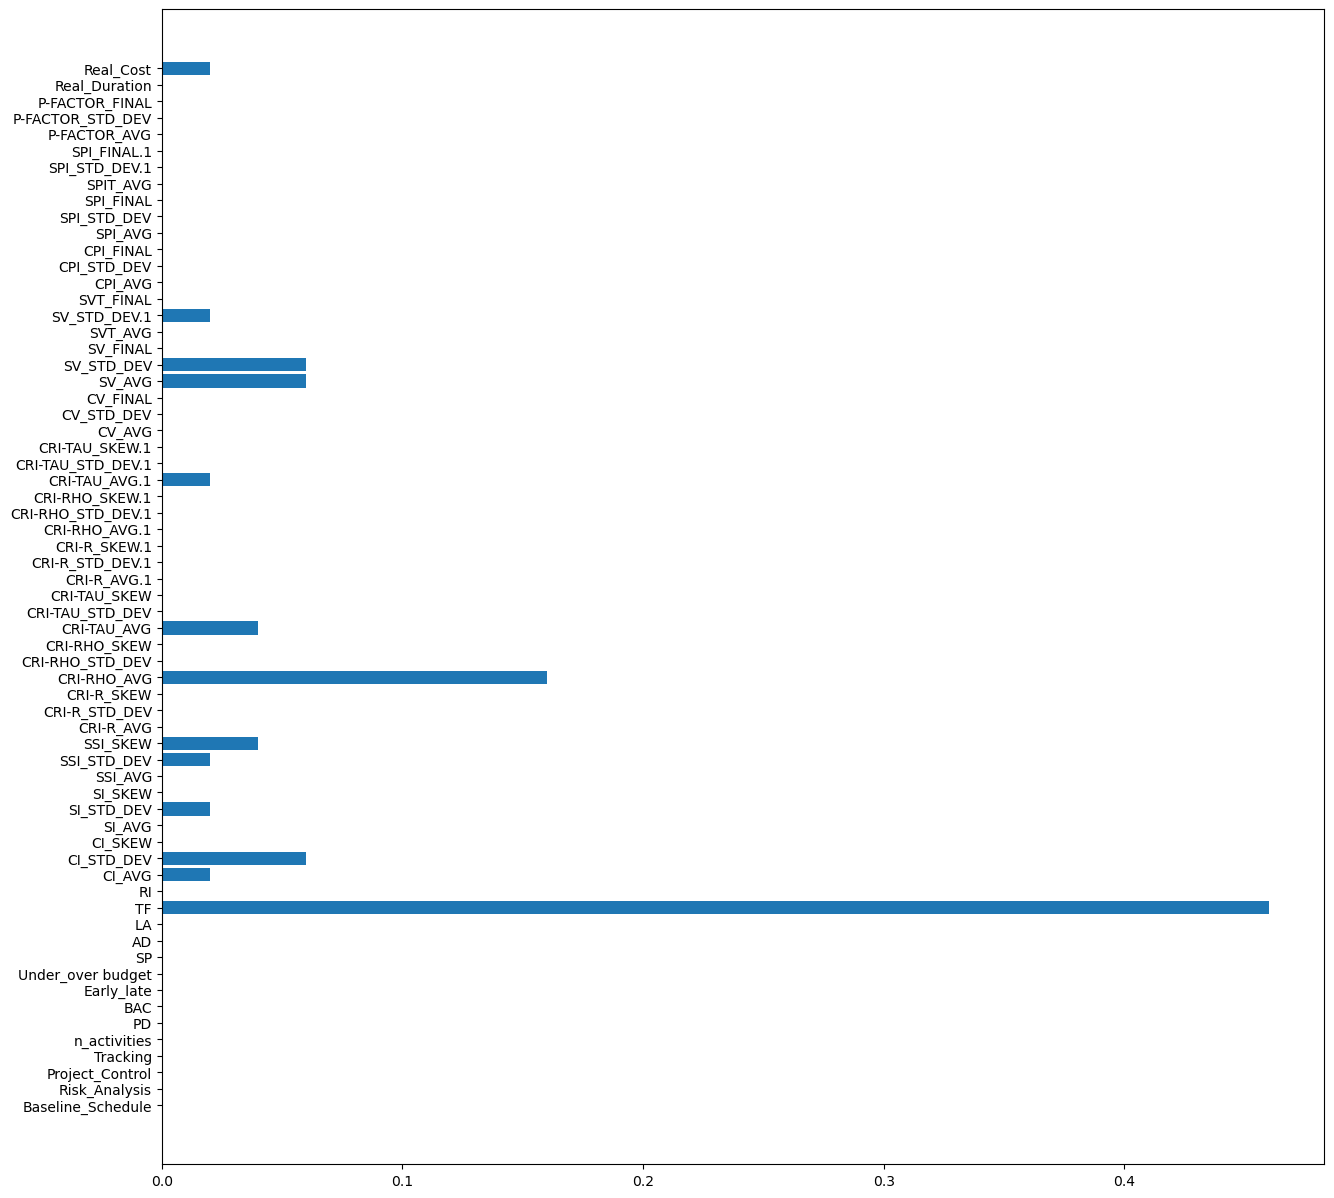

In [109]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(x_train.columns, fi_ada)

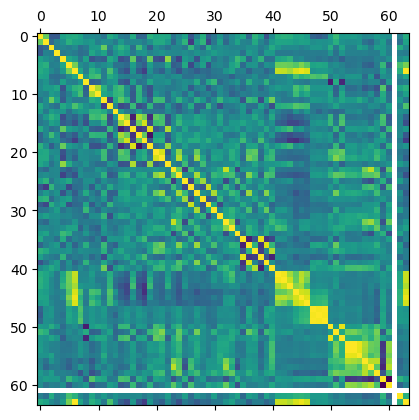

In [110]:
plt.matshow(x_train.corr())